In [8]:
import matplotlib.pyplot as plt
import numpy as np
import ipywidgets as widgets

In [9]:
Save=True
if not Save:
    %matplotlib notebook
else:
    %matplotlib inline

0
100
200
300
400
500
600
700
800
900


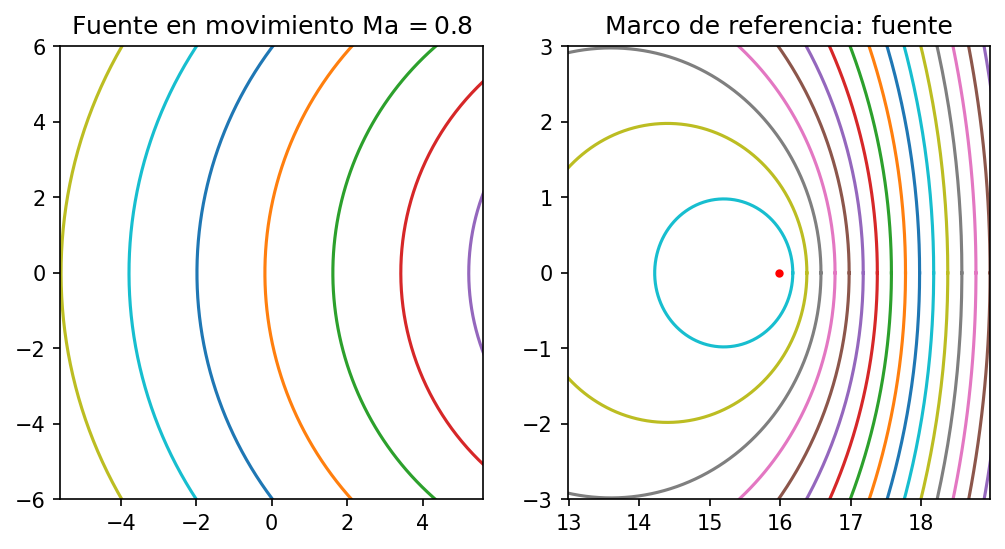

In [10]:
fig2 = plt.figure(figsize=(8,4),dpi=150)
ax2  = fig2.add_subplot(121)
ax22  = fig2.add_subplot(122)

p = [0,0]

theta = np.linspace(0,2*np.pi,1000)
x = np.cos(theta)
y = np.sin(theta)

linep, = ax2.plot(0*x,0*y,color='C0')
vector_line2 = [[0,linep,[0,0]]] # tiempo inicial, linea, centro

linep, = ax22.plot(0*x,0*y,color='C0')
vector_line22 = [[0,linep,[0,0]]] # tiempo inicial, linea, centro


# text_t2 = ax2.text(5,-6,r'$t/c = %.2f$'%0,ha='right',va='bottom')

deltat = 0.02
step_pulse = int(1/deltat)

pulse_count = 1

vel_fuente = [0.8,0] # V/c

point2, = ax2.plot(0,0,'.',color='red')
point22, = ax22.plot(0,0,'.',color='red')

def update2(t_int):
    t = deltat*t_int

#     text_t2.set_text(r'$t/c = %.2f$'%t)
    
    point2.set_data([vel_fuente[0]*t,vel_fuente[1]*t])
    point22.set_data([vel_fuente[0]*t,vel_fuente[1]*t])
    
    if t_int>0 and t_int%step_pulse==0:
        centro = [vel_fuente[0]*t,vel_fuente[1]*t]
        pulse_count = t_int//step_pulse
        
        linep_n, = ax2.plot(x+centro[0],y+centro[0],color='C'+str(pulse_count%10))
        vector_line2.append([t,linep_n,centro])
        
        linep_n, = ax22.plot(x+centro[0],y+centro[0],color='C'+str(pulse_count%10))
        vector_line22.append([t,linep_n,centro])
        
    for i in range(len(vector_line2)):
        r_new = t-vector_line2[i][0]
        centro = vector_line2[i][2]
        
        vector_line2[i][1].set_xdata(r_new*x+centro[0])
        vector_line2[i][1].set_ydata(r_new*y+centro[1])
        
        vector_line22[i][1].set_xdata(r_new*x+centro[0])
        vector_line22[i][1].set_ydata(r_new*y+centro[1])

    ax22.set_xlim([-3+t*vel_fuente[0],3+t*vel_fuente[0]])

    if Save:
        plt.savefig('pulso_subsonico%06d.png'%t_int)

# ax2.set_xlim([-3,3])
# ax2.set_ylim([-3,3])


play2 = widgets.Play(
    value=0,
    min=0,
    max=1000,
    step=1,
    interval=80,
    description="Press play",
    disabled=False
)

ax2.axis('equal')

ax2.set_xlim(-6,6)
ax2.set_ylim(-6,6)
ax22.set_ylim(-3,3)

if not Save:
    widgets.interact(update2,t_int=play2)

ax2.set_title('Fuente en movimiento $\operatorname{Ma}=%.1f $'%vel_fuente[0]) ;
ax22.set_title('Marco de referencia: fuente')

if Save:   
    for i in range(1000):
        if i%100==0:
            print(i)
        update2(i)

# mp4 (ubuntu)

ffmpeg -framerate 30 -pattern_type glob -i 'pulso_subsonico*.png'   -c:v libx264 -pix_fmt yuv420p pulso_subsonico.mp4 ; rm pulso_subsonico*.png